In [8]:
# MAC create virtual Environment
# !python3 -m venv .venv
# Install required packages
# !pip install -r requirement.txt

In [3]:
# The necessary libraries

import pandas as pd
import time
import seaborn 

# Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor


In [5]:
# Read given data
rawDataSet = pd.read_csv('day.csv', index_col='instant')

In [6]:
# Display first 5 rows 
rawDataSet.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
# Forcasting target variable (cnt) requires carefull examining of other impacting columns
workingDayData = rawDataSet[(rawDataSet.workingday==1)]
nonWorkingDayData = rawDataSet[(rawDataSet.workingday==0)]

print(f'Working Day Data\n{workingDayData.cnt.describe()}')
print(f'Non Working Day Data\n{nonWorkingDayData.cnt.describe()}')


Working Day Data
count     499.000000
mean     4590.332665
std      1876.247607
min        22.000000
25%      3362.000000
50%      4585.000000
75%      5989.000000
max      8362.000000
Name: cnt, dtype: float64
Non Working Day Data
count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: cnt, dtype: float64


In [59]:
# Minimum value on Non working Day for Demand forcasted is 605 compared to Working day which is only 22
# Maximum value on Working Day for Demand forcasted is 8714 compared to Working day which is 8362. Not much different

# Mean value of 4590 for working day is close to 4330 for non working day

In [60]:
yearOneWorkingDayData = workingDayData[(workingDayData.yr==0)]
yearTwoWorkingDayData = workingDayData[(workingDayData.yr==1)]

print(f'Year 2018 Working Day Data\n{yearOneWorkingDayData.cnt.describe()}')
print(f'Year 2019 Working Day Data\n{yearTwoWorkingDayData.cnt.describe()}')

Year 2018 Working Day Data
count     250.000000
mean     3425.056000
std      1297.860404
min       431.000000
25%      2133.250000
50%      3794.500000
75%      4573.750000
max      5895.000000
Name: cnt, dtype: float64
Year 2019 Working Day Data
count     249.000000
mean     5760.289157
std      1623.153777
min        22.000000
25%      4717.000000
50%      5992.000000
75%      7105.000000
max      8362.000000
Name: cnt, dtype: float64


In [61]:
yearOneNonWorkingDayData = nonWorkingDayData[(nonWorkingDayData.yr==0)]
yearTwoNonWorkingDayData = nonWorkingDayData[(nonWorkingDayData.yr==1)]

print(f'Year 2018 Non Working Day Data\n{yearOneNonWorkingDayData.cnt.describe()}')
print(f'Year 2019 Non Working Day Data\n{yearTwoNonWorkingDayData.cnt.describe()}')

Year 2018 Non Working Day Data
count     115.000000
mean     3363.817391
std      1545.306116
min       605.000000
25%      2104.500000
50%      3606.000000
75%      4687.000000
max      6043.000000
Name: cnt, dtype: float64
Year 2019 Non Working Day Data
count     116.000000
mean     5288.189655
std      2048.350908
min      1013.000000
25%      3488.750000
50%      5748.500000
75%      6863.500000
max      8714.000000
Name: cnt, dtype: float64


As its difficult to conclude on any correlation between variables. I would like to experiment with couple of algorithms to find out prediction accuracy.

Missing value count season        0
mnth          0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64


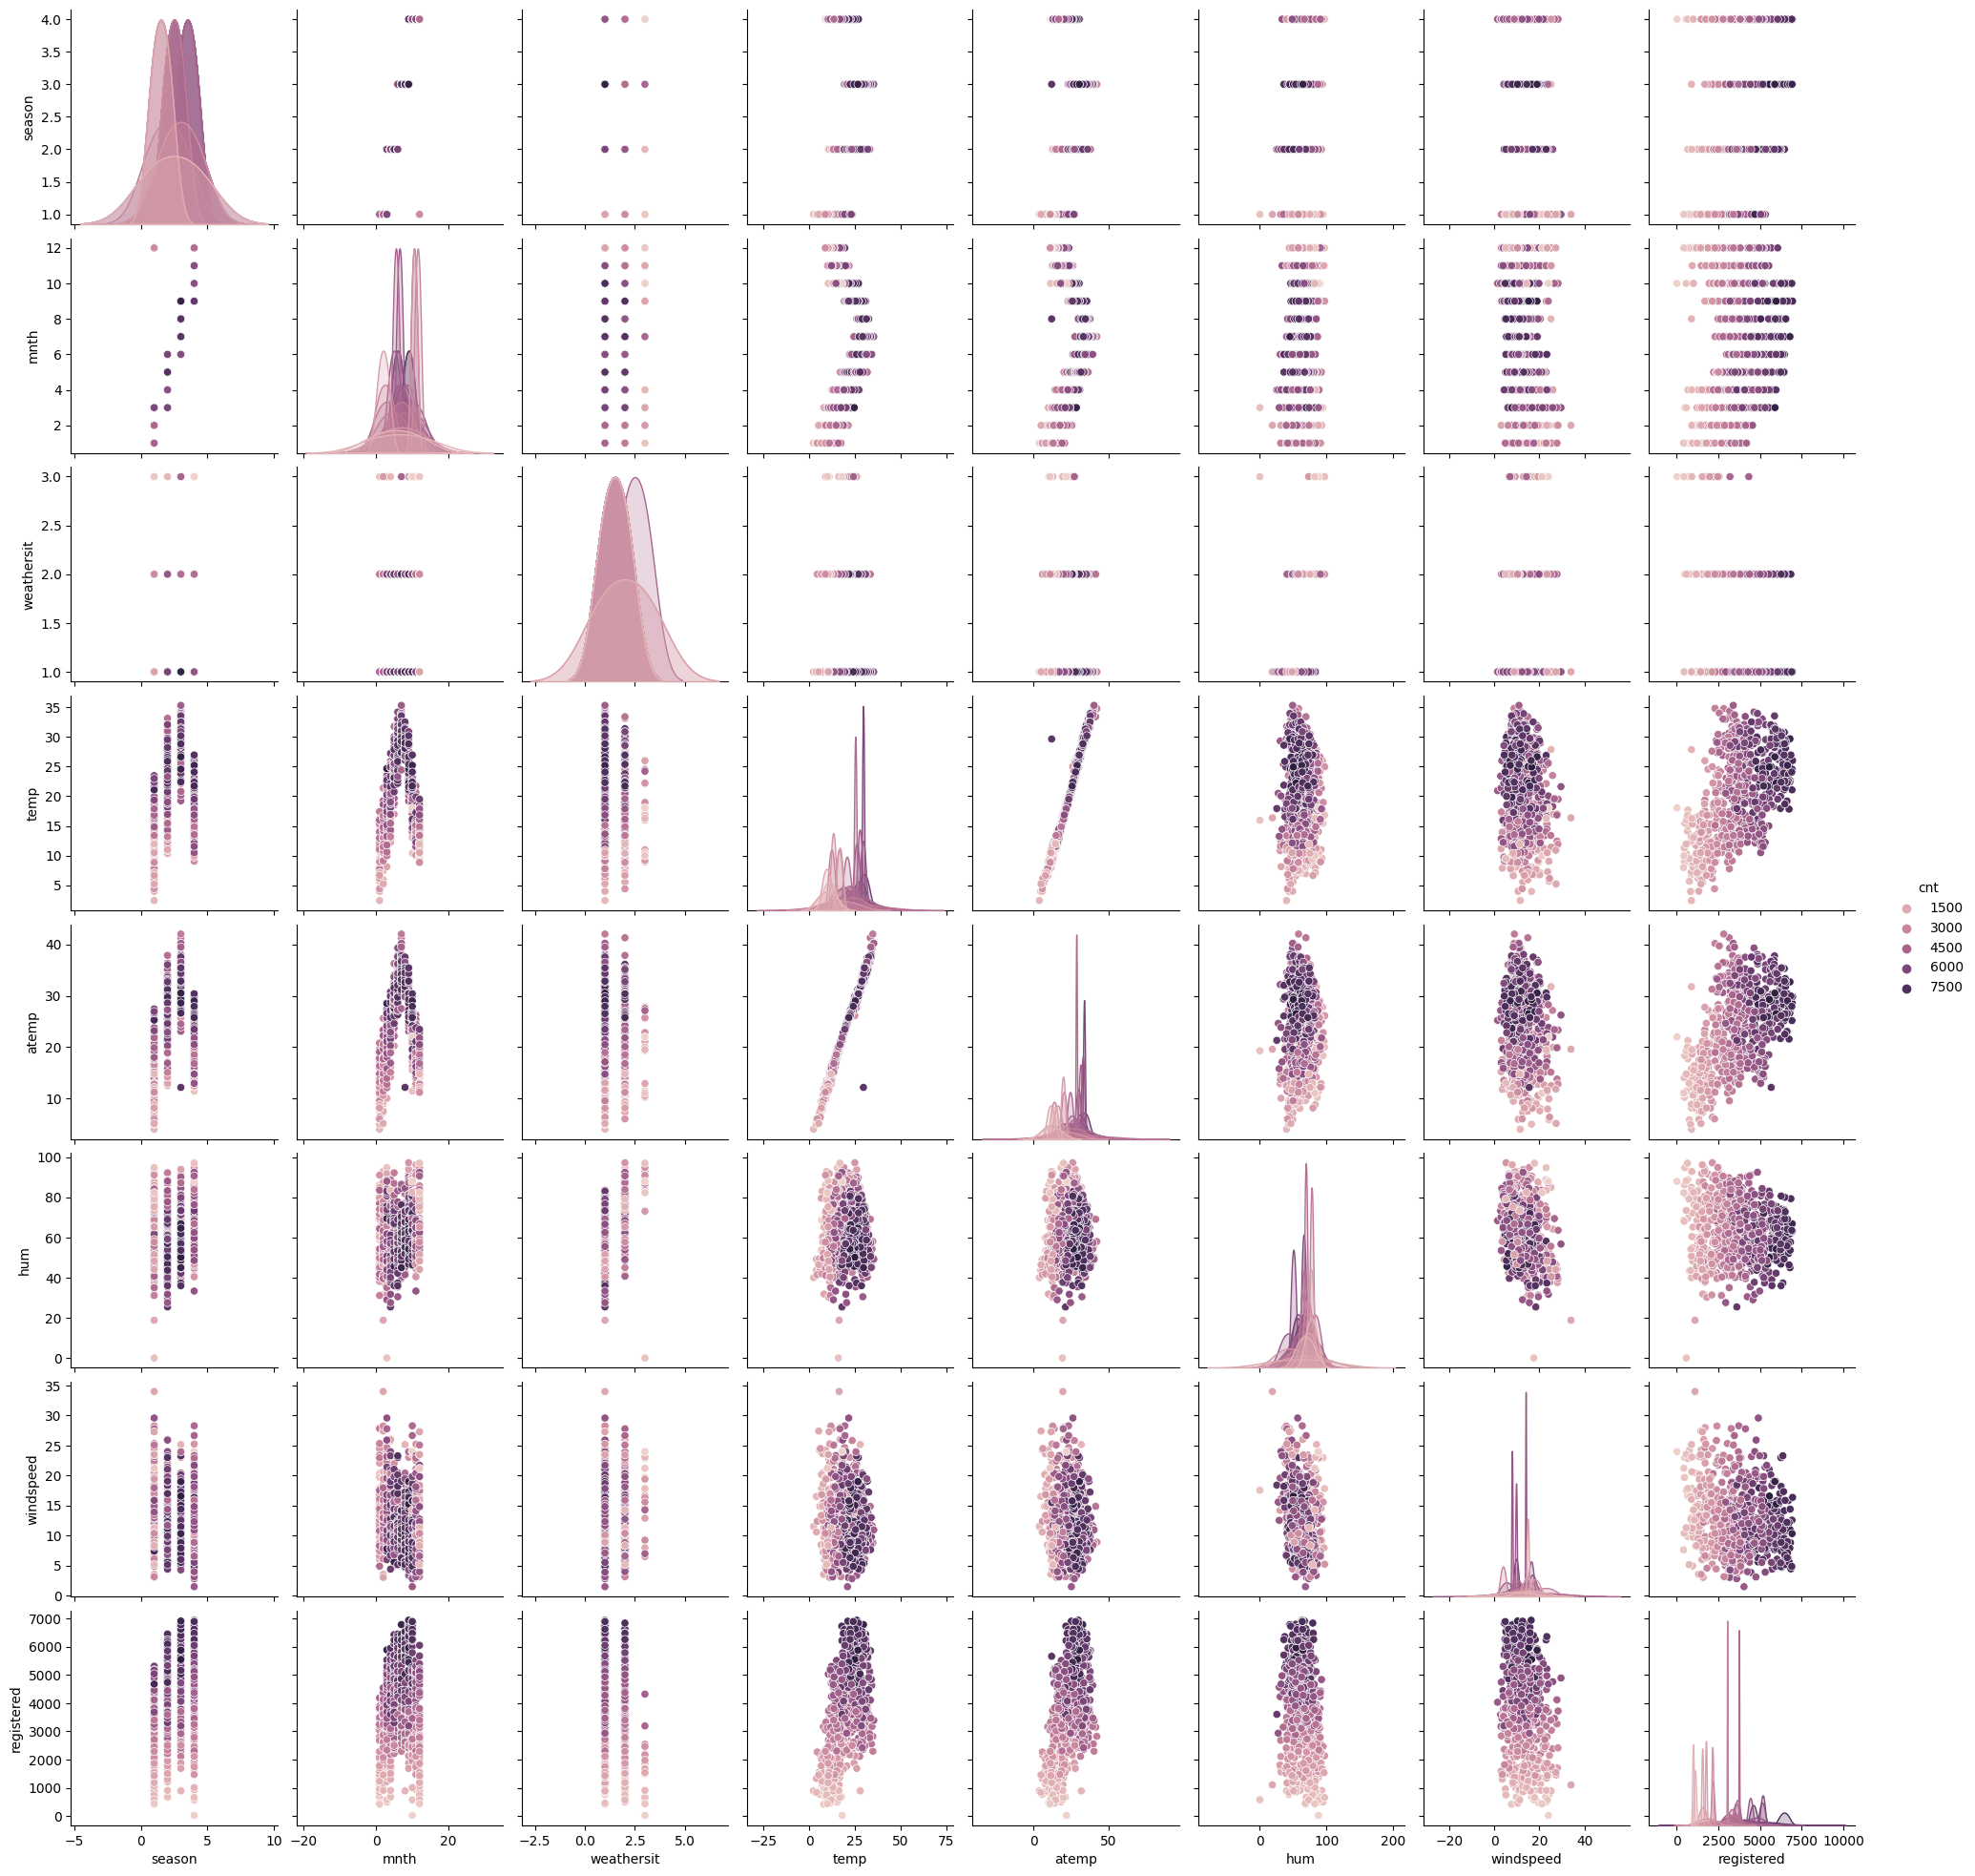

In [10]:
# Reading the file again..
rawDataSet = pd.read_csv('day.csv', index_col='instant')

rawDataSet = rawDataSet.drop(columns=['dteday', 'yr', 'holiday', 'weekday', 'workingday', 'casual'])
print(f'Missing value count {rawDataSet.isna().sum()}')

seaborn.pairplot(rawDataSet, hue = 'cnt')

In [181]:
# There are no missing values (NAN, NULL) hence we need not ipute anything

In [13]:
X = rawDataSet.drop( columns=['cnt'])
y = rawDataSet.cnt

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, train_size = .75)



In [14]:
# Testing with Linear Regression Model
start_time = time.time()
linearRegression_model = LinearRegression()
linearRegression_model.fit(train_X, train_y)
linearRegression_score = linearRegression_model.score(test_X, test_y)
predicted = linearRegression_model.predict(test_X)
linearRegression_mae = mean_absolute_error(test_y, predicted)
linearRegression_time = (time.time() - start_time)
linearRegression_df = pd.DataFrame({'REGRESSION NAME': 'LinearRegression', 'MAE': linearRegression_mae, 'TRAIN TEST TIME': linearRegression_time, 'SCORE': linearRegression_score}, index=[0])

print(f'Mean Absolute Error using Linear Regression:  {linearRegression_mae} Score: {linearRegression_score*100}%')

Mean Absolute Error using Linear Regression:  398.2684487413511 Score: 93.14156772261049%


In [184]:
# Testing with Random Forest Regressor
start_time = time.time()
randomForestReg_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForestReg_model.fit(train_X, train_y)
randomForestReg_score = randomForestReg_model.score(test_X, test_y)
predicted = randomForestReg_model.predict(test_X)
randomForestReg_mae = mean_absolute_error(test_y, predicted)
randomForest_time = (time.time() - start_time)
randomForest_df = pd.DataFrame({'REGRESSION NAME': 'RandomForest', 'MAE': randomForestReg_mae, 'TRAIN TEST TIME': randomForest_time, 'SCORE': randomForestReg_score}, index=[0])

print(f'Mean Absolute Error using Random Forest Regression:  {randomForestReg_mae} Score: {randomForestReg_score*100}%')

Mean Absolute Error using Random Forest Regression:  394.5057852432742 Score: 93.12898626970818%


In [185]:
# Testing with Linear SVM
start_time = time.time()
svm_model = LinearSVR(max_iter=1500000)
svm_model.fit(train_X, train_y)
svm_score = svm_model.score(test_X, test_y)
predicted = svm_model.predict(test_X)
svm_mae = mean_absolute_error(test_y, predicted)
svm_time = (time.time() - start_time)
svm_df = pd.DataFrame({'REGRESSION NAME': 'Svm', 'MAE': svm_mae, 'TRAIN TEST TIME': svm_time, 'SCORE': svm_score}, index=[0])

print(f'Mean Absolute Error using SVM:  {svm_mae} Score: {svm_score*100}%')

Mean Absolute Error using SVM:  373.27471297422727 Score: 92.02028572402054%


/Users/tusharsood/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [186]:
# Testing with Xtreme Gradient Boosting
start_time = time.time()
xgboost_model = XGBRegressor(n_estimators=100)
xgboost_model.fit(train_X, train_y)
xgboost_score = xgboost_model.score(test_X, test_y)
predicted = xgboost_model.predict(test_X)
xgboost_mae = mean_absolute_error(test_y, predicted)
xgboost_time = (time.time() - start_time)
xgboost_df = pd.DataFrame({'REGRESSION NAME': 'Xgboost', 'MAE': xgboost_mae, 'TRAIN TEST TIME': xgboost_time, 'SCORE': xgboost_score}, index=[0])

print(f'Mean Absolute Error using XGB:  {xgboost_mae} Score: {xgboost_score*100}%')

Mean Absolute Error using XGB:  427.03709369930414 Score: 92.99910654951654%


In [187]:
# Testing with Decision Tree Regression
start_time = time.time()
decisionTree_model = DecisionTreeRegressor() 
decisionTree_model.fit(train_X, train_y)
decisionTree_score = decisionTree_model.score(test_X, test_y)
predicted = decisionTree_model.predict(test_X)
decisionTree_mae = mean_absolute_error(test_y, predicted)
decisionTree_time = (time.time() - start_time)
decisionTree_df = pd.DataFrame({'REGRESSION NAME': 'DecisionTree', 'MAE': decisionTree_mae, 'TRAIN TEST TIME': decisionTree_time, 'SCORE': decisionTree_score}, index=[0])

print(f'Mean Absolute Error using Decision Tree:  {decisionTree_mae} Score: {decisionTree_score*100}%')

Mean Absolute Error using Decision Tree:  436.7103825136612 Score: 90.3843215664903%


In [188]:
# Testing with Lasso Regression
start_time = time.time()
lasso_model = Lasso(max_iter=3000)
lasso_model.fit(train_X, train_y)
lasso_score = lasso_model.score(test_X, test_y)
predicted = lasso_model.predict(test_X)
lasso_mae = mean_absolute_error(test_y, predicted)
lasso_time = (time.time() - start_time)
lasso_df = pd.DataFrame({'REGRESSION NAME': 'Lasso', 'MAE': lasso_mae, 'TRAIN TEST TIME': lasso_time, 'SCORE': lasso_score}, index=[0])

print(f'Mean Absolute Error using Lasso Regression:  {lasso_mae} Score: {lasso_score*100}%')

Mean Absolute Error using Lasso Regression:  398.52081339049573 Score: 93.13447206498434%


In [189]:
# Testing with MLP Regression
start_time = time.time()
nlp_model = MLPRegressor(max_iter=2000)
nlp_model.fit(train_X, train_y)
nlp_score = nlp_model.score(test_X, test_y)
predicted = nlp_model.predict(test_X)
nlp_mae = mean_absolute_error(test_y, predicted)
nlp_time = (time.time() - start_time)
nlp_df = pd.DataFrame({'REGRESSION NAME': 'NLP', 'MAE': nlp_mae, 'TRAIN TEST TIME': nlp_time, 'SCORE': nlp_score}, index=[0])

print(f'Mean Absolute Error using NLP:  {nlp_mae} Score: {nlp_score*100}%')

Mean Absolute Error using NLP:  457.856831631482 Score: 91.25786873407135%


In [190]:
# Testing with K Nearest Neighbor
start_time = time.time()
knn_model = KNeighborsRegressor()
knn_model.fit(train_X, train_y)
knn_score = knn_model.score(test_X, test_y)
predicted = knn_model.predict(test_X)
knn_mae = mean_absolute_error(test_y, predicted)
knn_time = (time.time() - start_time)
knn_df = pd.DataFrame({'REGRESSION NAME': 'KNN', 'MAE': knn_mae, 'TRAIN TEST TIME': knn_time, 'SCORE': knn_score}, index=[0])

print(f'Mean Absolute Error using KNN:  {knn_mae} Score: {knn_score*100}%')

Mean Absolute Error using KNN:  484.58360655737704 Score: 89.99048258674927%


In [192]:
# Testing with Ridge Regression
start_time = time.time()
ridge_model = Ridge()
ridge_model.fit(train_X, train_y)
ridge_score = ridge_model.score(test_X, test_y)
predicted = ridge_model.predict(test_X)
ridge_mae = mean_absolute_error(test_y, predicted)
ridgeCalc_time = (time.time() - start_time)
ridge_df = pd.DataFrame({'REGRESSION NAME': 'Ridge', 'MAE': ridge_mae, 'TRAIN TEST TIME': ridgeCalc_time, 'SCORE': ridge_score}, index=[0])

print(f'Mean Absolute Error using Gaussian Regressor:  {ridge_mae} Score: {ridge_score*100}%')


Mean Absolute Error using Gaussian Regressor:  398.29901149681507 Score: 93.14060751765942%


<AxesSubplot:title={'center':'Accuracy Scores'}, xlabel='REGRESSION NAME'>

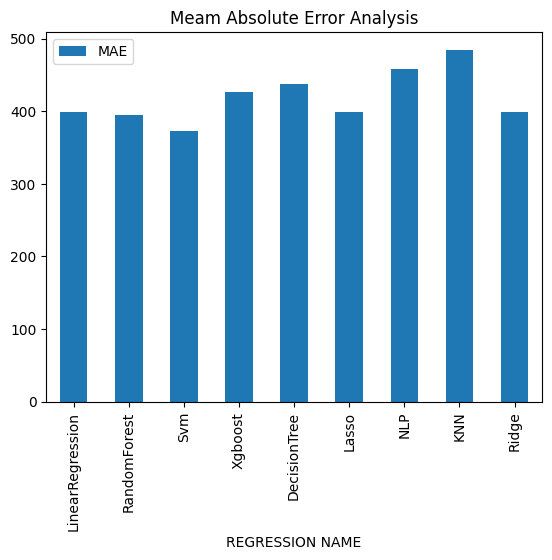

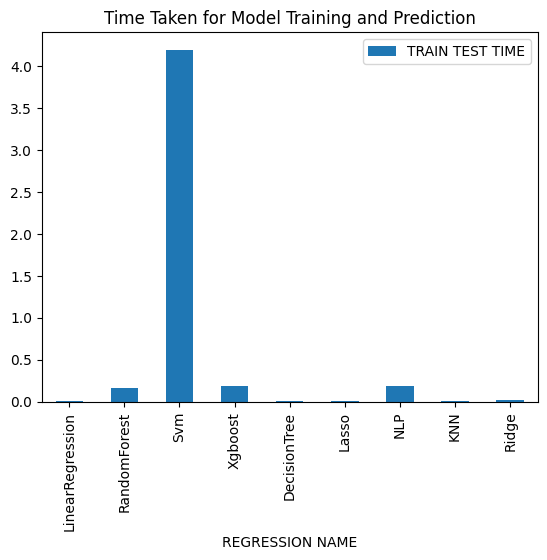

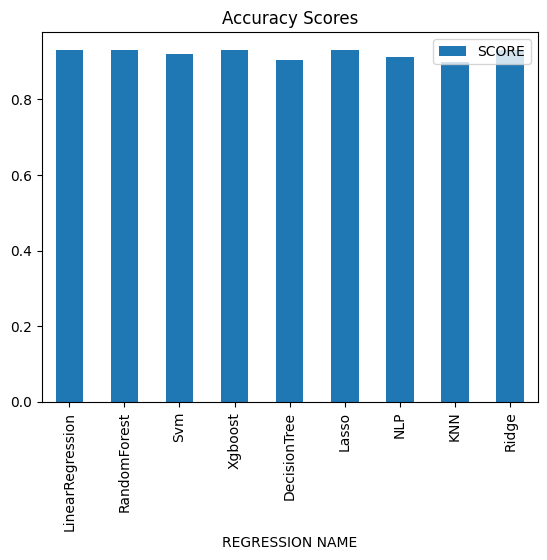

In [197]:
compareRegressionAlgos = pd.DataFrame(columns=['REGRESSION NAME', 'MAE', 'TRAIN TEST TIME', 'SCORE'], index=['REGRESSION NAME'])
compareRegressionAlgos = pd.concat([linearRegression_df, randomForest_df, svm_df, xgboost_df, decisionTree_df, lasso_df, nlp_df, knn_df, ridge_df])
compareRegressionAlgos.sort_values(by=['SCORE', 'TRAIN TEST TIME', 'MAE' ])
compareRegressionAlgos.plot(x='REGRESSION NAME', y=['MAE'], kind='bar', title='Meam Absolute Error Analysis')
compareRegressionAlgos.plot(x='REGRESSION NAME', y=['TRAIN TEST TIME'], kind='bar', title='Time Taken for Model Training and Prediction')
compareRegressionAlgos.plot(x='REGRESSION NAME', y=['SCORE'], kind='bar', title='Accuracy Scores')

In [198]:
compareRegressionAlgos.head(3)

,REGRESSION NAME,MAE,TRAIN TEST TIME,SCORE
0,LinearRegression,398.268449,0.007097,0.931416
0,RandomForest,394.505785,0.161691,0.931290
0,Svm,373.274713,4.193126,0.920203


Top Algorithms with highest accuracy are Linear Regression, Random Forest and SVM. However, best pick among these would be Linear Regression for this case.



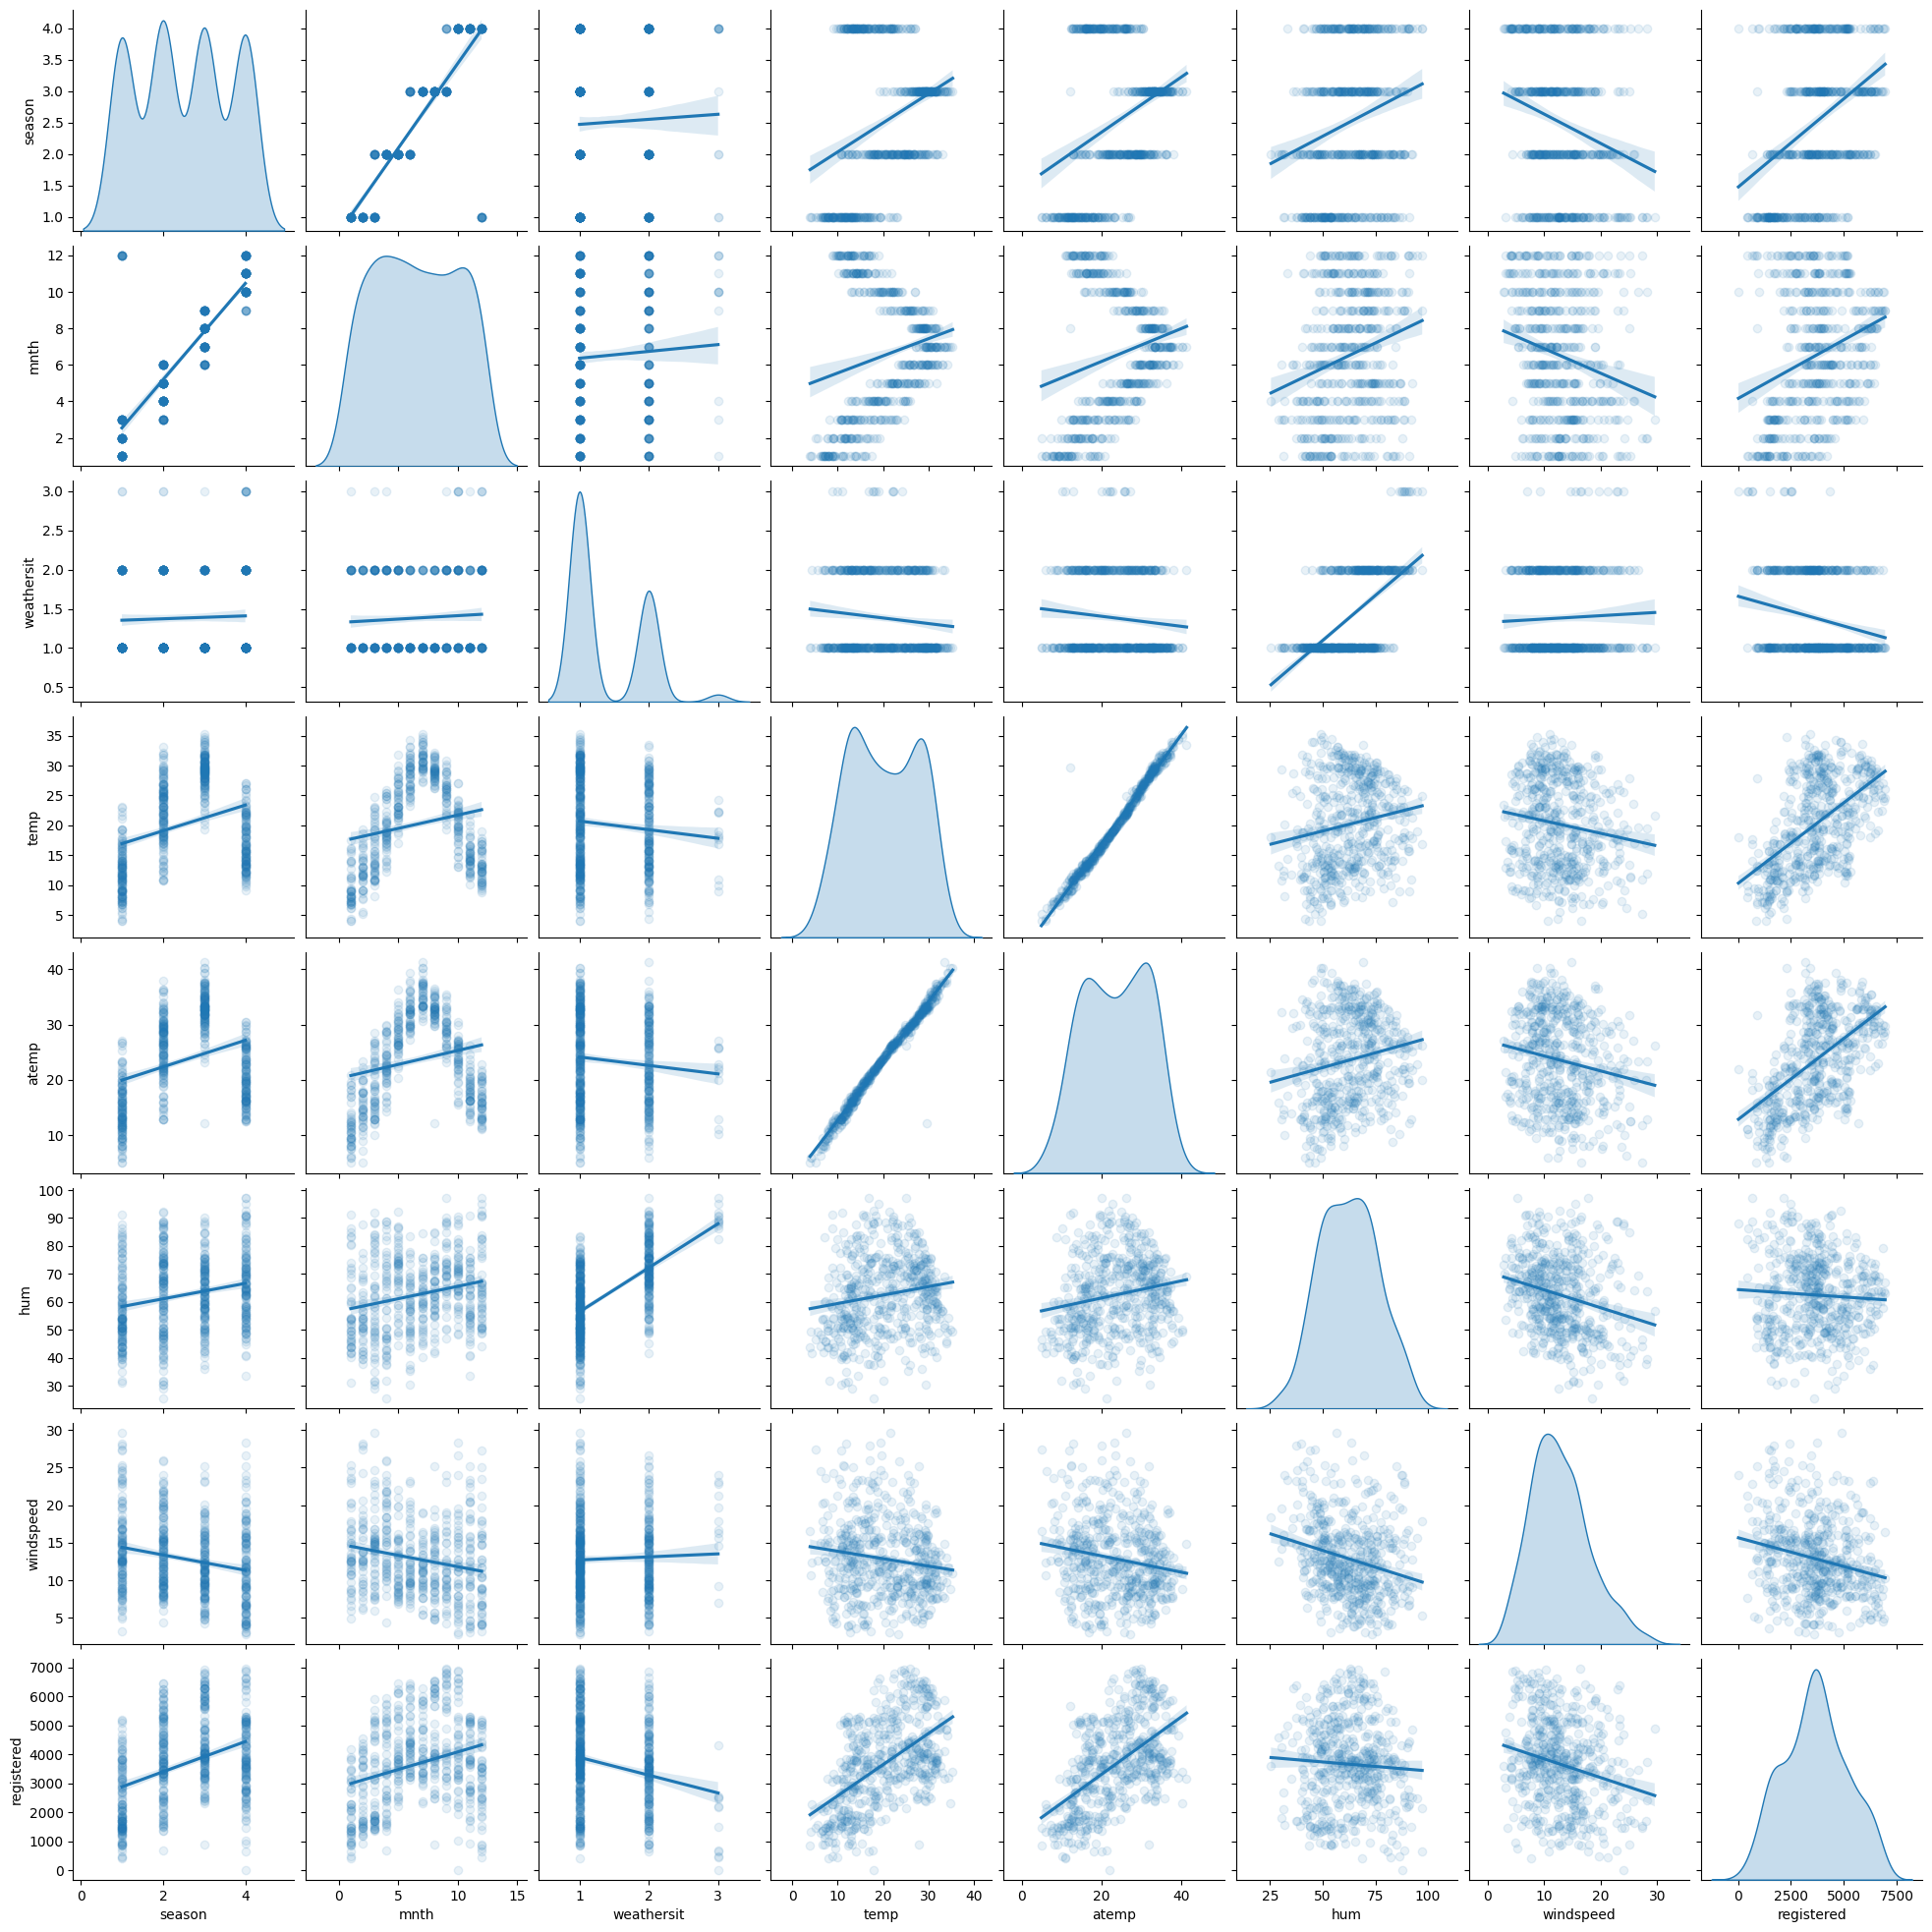

In [17]:
# As Linear Regression gave best scores finding out the most impactful features.
seaborn.pairplot(train_X, kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})